In [31]:
import numpy as np
import serial
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

tf.__version__

'2.18.0'

In [32]:
# load extracted dataset from MIT-BIH dataset Arrhythmia database (only N, A, V, R, L)
#data = tf.keras.datasets.fashion_mnist

X_train_full = np.load('Data/X.npy')
y_train_full = np.load('Data/y.npy')
X_test = np.load('Data/X_val.npy')
y_test = np.load('Data/y_val.npy')

# remove distance between two consecutive peaks
X_train_full = np.array(X_train_full[:,:-2])
X_test = np.array(X_test[:,:-2])

print("X_train_full shape from MIT-BIH:",X_train_full.shape)
print("X_text shape from MIT-BIH:",X_test.shape)

# save data for reuse...
np.save('X_train_full.npy', X_train_full)
np.save('X_test.npy', X_test)
np.save('y_train_full.npy', y_train_full)
np.save('y_test_arrythmia_classes.npy', y_test)



X_train_full shape from MIT-BIH: (5000, 181)
X_text shape from MIT-BIH: (5000, 181)


In [33]:
from tensorflow.keras.utils import to_categorical

# Conversion des labels en indices
class_names = {'A':'Atrial premature contraction (A)', 'V':'Premature venticular contraction (V)',
               'N':'Normal beat (N)', 'L':'Left bundle branch block (L)', 'R':'Right bundle branch beat (R)'}
mapping_to_numbers = {}
y_train_full_number = np.zeros(len(y_train_full), dtype=int)
for i, raw_label in enumerate(y_train_full):
    if raw_label not in mapping_to_numbers:
        mapping_to_numbers[raw_label] = len(mapping_to_numbers)
    y_train_full_number[i] = mapping_to_numbers[raw_label]

# Traitement de y_test avec les mêmes mappings
y_test_number = np.zeros(len(y_test), dtype=int)
for i in range(len(y_test)):
    y_test_number[i] = mapping_to_numbers[y_test[i]]

print("Class names for numbers:", mapping_to_numbers)



Class names for numbers: {'A': 0, 'V': 1, 'N': 2, 'L': 3, 'R': 4}


In [34]:
X_valid, X_train = X_train_full[:2500], X_train_full[2500:]
y_valid_full_number, y_train_full_number = y_train_full_number[:2500], y_train_full_number[2500:]


y_train_categorical = to_categorical(y_train_full_number, num_classes=5)
y_valid_categorical = to_categorical(y_valid_full_number, num_classes=5)

print(f'Taille de X_train: {X_train.shape}')
print(f'Taille de y_train_categorical: {y_train_categorical.shape}')
print(f'Taille de X_valid: {X_valid.shape}')
print(f'Taille de y_valid_categorical: {y_valid_categorical.shape}')

Taille de X_train: (2500, 181)
Taille de y_train_categorical: (2500, 5)
Taille de X_valid: (2500, 181)
Taille de y_valid_categorical: (2500, 5)


In [35]:


# Modèle CNN
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(181, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 179, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 89, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 87, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 41, 32)              │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 20, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           3,205 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,717 (61.39 KB)

 Trainable params: 15,717 (61.39 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Entraînement du modèle
history = model.fit(X_train, y_train_categorical, epochs=30, batch_size=32, validation_data=(X_valid, y_valid_categorical))


Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3052 - loss: 1.5013 - val_accuracy: 0.6568 - val_loss: 1.0402
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6140 - loss: 1.0590 - val_accuracy: 0.7568 - val_loss: 0.7676
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7152 - loss: 0.8232 - val_accuracy: 0.8248 - val_loss: 0.6515
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7361 - loss: 0.7801 - val_accuracy: 0.8284 - val_loss: 0.5698
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7797 - loss: 0.6621 - val_accuracy: 0.8508 - val_loss: 0.5110
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7947 - loss: 0.6150 - val_accuracy: 0.8612 - val_loss: 0.4735
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7975 - loss: 0.6027 - val_accuracy: 0.8688 - val_loss: 0.4519
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8126 - loss: 0.5505 - val_accuracy: 0.8636 - val_loss

In [37]:
# Évaluation des performances sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(X_valid, y_valid_categorical)
print('Valeur de la loss:' , val_accuracy)
print(f'Précision sur les données de validation: {val_accuracy*100:.2f}%')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9268 - loss: 0.2306
Valeur de la loss: 0.9259999990463257
Précision sur les données de validation: 92.60%


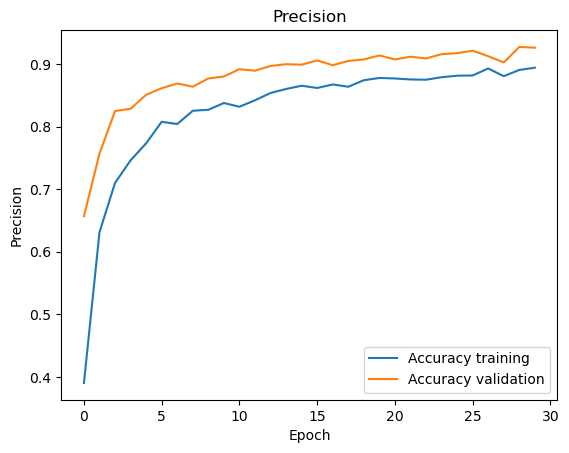

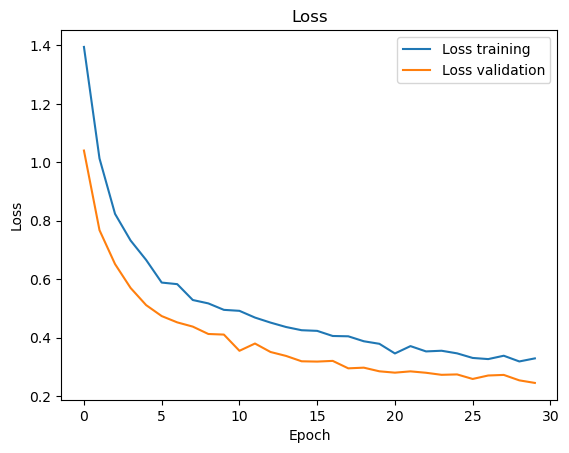

In [38]:


# Tracé de la précision d'entraînement et de validation
plt.plot(history.history['accuracy'], label='Accuracy training')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Tracé de la perte d'entraînement et de validation
plt.plot(history.history['loss'], label='Loss training')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() 
plt.show()
